In [2]:
import numpy as np
import pandas as pd

import tensorflow as tf

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

NotFoundError: dlopen(/Users/sidshah/miniconda3/envs/dmml/lib/python3.11/site-packages/tensorflow-plugins/libmetal_plugin.dylib, 0x0006): Symbol not found: __ZN10tensorflow16TensorShapeProtoC1ERKS0_
  Referenced from: <D77D277A-B383-3F86-B67B-CB338CED68A4> /Users/sidshah/miniconda3/envs/dmml/lib/python3.11/site-packages/tensorflow-plugins/libmetal_plugin.dylib
  Expected in:     <E232C875-F50C-32BA-8200-00E4EE27C31B> /Users/sidshah/miniconda3/envs/dmml/lib/python3.11/site-packages/tensorflow/python/_pywrap_tensorflow_internal.so

# Fashion MNIST Data

In [ ]:
dataset = "Fashion"

### Setting Up Data

In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]
X_train_new = X_train.reshape(len(X_train),-1)
X_valid_new = X_valid.reshape(len(X_valid),-1)

In [ ]:
X_train, X_valid, X_test = X_train / 255., X_valid / 255., X_test / 255.

In [ ]:
class_names = ["T-shirt/top",
               "Trouser",
               "Pullover",
               "Dress",
               "Coat",
               "Sandal",
               "Shirt",
               "Sneaker",
               "Bag",
               "Ankle boot"]

## Clustering

### Principal Component Analysis

In [ ]:
pca = PCA(n_components=28,
          random_state=42)
pca.fit(X_train_new)
X_train_new = pca.transform(X_train_new)
X_valid_new = pca.transform(X_valid_new)

### Hyper-Parameter Tuning

In [ ]:
# kmeans_per_k = [KMeans(n_clusters=k,
#                        init="k-means++",
#                        max_iter=100,
#                        n_init=10,
#                        random_state=42)\
#                         .fit(X_train_new)
#                     for k in range(50, 1000 + 1, 50)]

# inertias = [model.inertia_ for model in kmeans_per_k]

# plt.figure(figsize=(12,4))
# plt.plot([i for i in range(50, 1000 + 1, 50)],
#          inertias,
#          "bo-")
# plt.xlabel("$k$")
# plt.ylabel("Inertia")
# plt.title("Inertia vs $k$")
# plt.savefig(f"Output/{dataset} - Inertia.png")
# plt.close()

### Final Clustering

In [ ]:
k = 450
kmeans = KMeans(n_clusters=k,
                n_init=10,
                init='k-means++',
                random_state=42)
kmeans.fit(X_train_new)
cluster_distance = kmeans.transform(X_train_new)

## MLPs

### Model 1

In [ ]:
km_old_labels = kmeans.labels_
closest = np.argmin(cluster_distance, axis=0)
labels = np.array([y_train[i] for i in closest])

In [ ]:
tf.random.set_seed(42)
model1 = tf.keras.Sequential()
model1.add(tf.keras.layers.InputLayer(input_shape=[28, 28]))
model1.add(tf.keras.layers.Flatten())
model1.add(tf.keras.layers.Dense(300, activation="relu"))
model1.add(tf.keras.layers.Dense(100, activation="relu"))
model1.add(tf.keras.layers.Dense(10, activation="softmax"))

model1.compile(loss="sparse_categorical_crossentropy",
               optimizer="sgd",
               metrics=["accuracy"])

history = model1.fit(X_train,
                     y_train,
                     epochs=15,
                     verbose=0,
                     validation_data=(X_valid, y_valid))

: 

##### Plotting Results

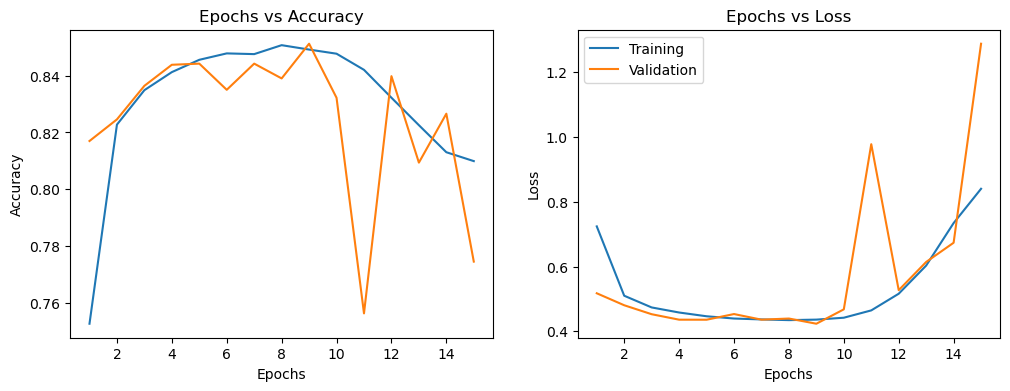

In [ ]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = list(range(1, len(train_loss) + 1))

# Create a figure and two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))  # 1 row, 2 columns

# Plot data on each subplot
ax1.plot(epochs, train_acc, label="Training")
ax1.plot(epochs, val_acc, label="Validation")
ax2.plot(epochs, train_loss, label="Training")
ax2.plot(epochs, val_loss, label="Validation")

# Add labels and title
ax1.set_xlabel("Epochs")
ax1.set_ylabel("Accuracy")
ax1.set_title("Epochs vs Accuracy")
ax2.set_xlabel("Epochs")
ax2.set_ylabel("Loss")
ax2.set_title("Epochs vs Loss")

# Add legend
plt.legend()

# Show the plot
plt.savefig(f"Output/{dataset} - Model 1.png")
plt.close()

### Model 2

In [ ]:
X_train_ri = np.array([X_train[i] for i in closest])
y_train_ri = np.array([y_train[i] for i in closest])

In [ ]:
tf.random.set_seed(42)
model2 = tf.keras.Sequential()
model2.add(tf.keras.layers.InputLayer(input_shape=[28, 28]))
model2.add(tf.keras.layers.Flatten())
model2.add(tf.keras.layers.Dense(300, activation="relu"))
model2.add(tf.keras.layers.Dense(100, activation="relu"))
model2.add(tf.keras.layers.Dense(10, activation="softmax"))

model2.compile(loss="sparse_categorical_crossentropy",
               optimizer="sgd",
               metrics=["accuracy"])

history = model2.fit(X_train_ri, 
                     y_train_ri, 
                     epochs=15,
                     verbose=0,
                     validation_data=(X_valid, y_valid))

#### Plotting Results

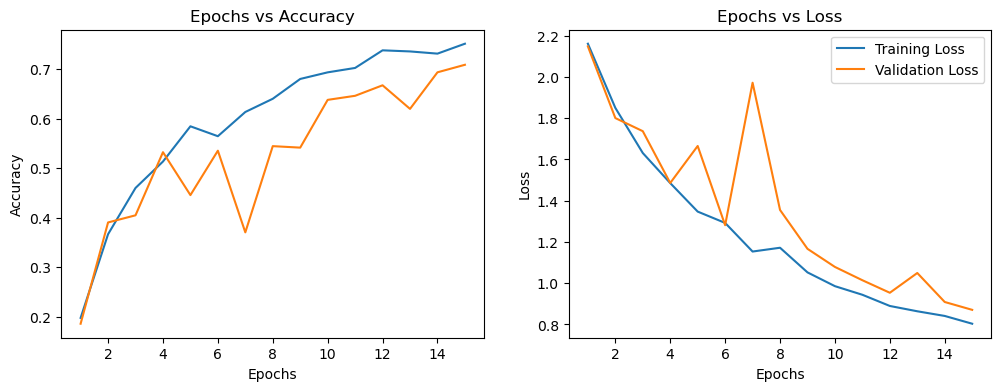

In [ ]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = list(range(1, len(train_loss) + 1))

# Create a figure and two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))  # 1 row, 2 columns

# Plot data on each subplot
ax1.plot(epochs, train_acc, label="Training Accuracy")
ax1.plot(epochs, val_acc, label="Validation Accuracy")
ax2.plot(epochs, train_loss, label="Training Loss")
ax2.plot(epochs, val_loss, label="Validation Loss")

# Add labels and title
ax1.set_xlabel("Epochs")
ax1.set_ylabel("Accuracy")
ax1.set_title("Epochs vs Accuracy")
ax2.set_xlabel("Epochs")
ax2.set_ylabel("Loss")
ax2.set_title("Epochs vs Loss")

# Add legend
plt.legend()

plt.savefig(f"Output/{dataset} - Model 2.png")
plt.close()

### Model 3

In [ ]:
X_train_fp = X_train
y_train_fp = np.empty(len(X_train_fp), dtype=np.int32)
for i in range(0,len(X_train_fp)):
   y_train_fp[i] = labels[km_old_labels[i]]

In [ ]:
tf.random.set_seed(42)
model3 = tf.keras.Sequential()
model3.add(tf.keras.layers.InputLayer(input_shape=[28, 28]))
model3.add(tf.keras.layers.Flatten())
model3.add(tf.keras.layers.Dense(300, activation="relu"))
model3.add(tf.keras.layers.Dense(100, activation="relu"))
model3.add(tf.keras.layers.Dense(10, activation="softmax"))

model3.compile(loss="sparse_categorical_crossentropy",
               optimizer="sgd",
               metrics=["accuracy"])

history = model3.fit(X_train_fp,
                     y_train_fp,
                     epochs=15,
                     verbose=0,
                     validation_data=(X_valid, y_valid))

#### Plotting Results

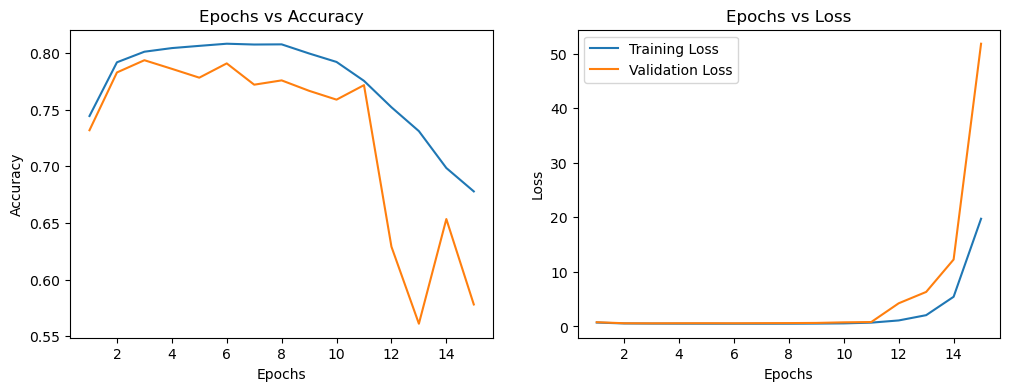

In [ ]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = list(range(1, len(train_loss) + 1))

# Create a figure and two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))  # 1 row, 2 columns

# Plot data on each subplot
ax1.plot(epochs, train_acc, label="Training Accuracy")
ax1.plot(epochs, val_acc, label="Validation Accuracy")
ax2.plot(epochs, train_loss, label="Training Loss")
ax2.plot(epochs, val_loss, label="Validation Loss")

# Add labels and title
ax1.set_xlabel("Epochs")
ax1.set_ylabel("Accuracy")
ax1.set_title("Epochs vs Accuracy")
ax2.set_xlabel("Epochs")
ax2.set_ylabel("Loss")
ax2.set_title("Epochs vs Loss")

# Add legend
plt.legend()

plt.savefig(f"Output/{dataset} - Model 3.png")
plt.close()

### Model 4

In [ ]:
X_distances = cluster_distance[np.arange(len(X_train)), kmeans.labels_]
for i in range(k):
    in_cluster = (kmeans.labels_ == i)
    cluster_dist = X_distances[in_cluster]
    cutoff = np.percentile(cluster_dist, 20)
    above_cutoff = (X_distances > cutoff)
    X_distances[in_cluster & above_cutoff] = -1

pp = (X_distances != -1)
X_train_pp = X_train[pp]
y_train_pp = y_train_fp[pp]

In [ ]:
tf.random.set_seed(42)
model4 = tf.keras.Sequential()
model4.add(tf.keras.layers.InputLayer(input_shape=[28, 28]))
model4.add(tf.keras.layers.Flatten())
model4.add(tf.keras.layers.Dense(300, activation="relu"))
model4.add(tf.keras.layers.Dense(100, activation="relu"))
model4.add(tf.keras.layers.Dense(10, activation="softmax"))

model4.compile(loss="sparse_categorical_crossentropy",
               optimizer="sgd",
               metrics=["accuracy"])

history = model4.fit(X_train_pp,
                     y_train_pp, 
                     epochs=15,
                     use_multiprocessing=True,
                     verbose=0,
                     validation_data=(X_valid, y_valid))

#### Plotting Results

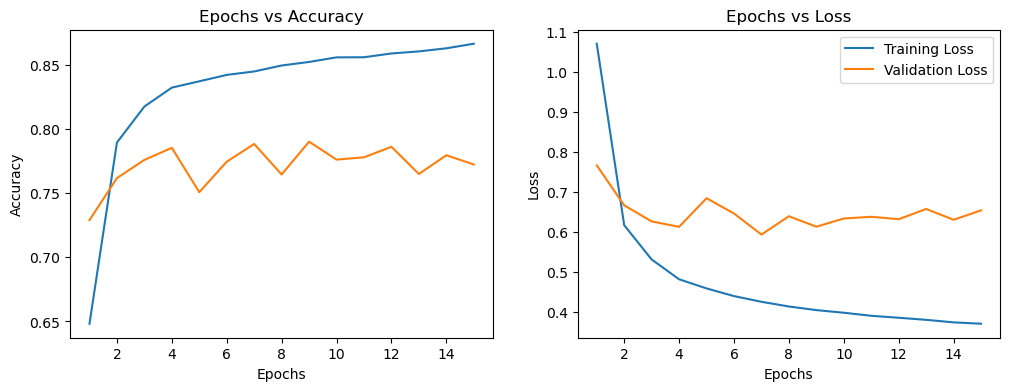

In [ ]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = list(range(1, len(train_loss) + 1))

# Create a figure and two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))  # 1 row, 2 columns

# Plot data on each subplot
ax1.plot(epochs, train_acc, label="Training Accuracy")
ax1.plot(epochs, val_acc, label="Validation Accuracy")
ax2.plot(epochs, train_loss, label="Training Loss")
ax2.plot(epochs, val_loss, label="Validation Loss")

# Add labels and title
ax1.set_xlabel("Epochs")
ax1.set_ylabel("Accuracy")
ax1.set_title("Epochs vs Accuracy")
ax2.set_xlabel("Epochs")
ax2.set_ylabel("Loss")
ax2.set_title("Epochs vs Loss")

# Add legend
plt.legend()

plt.savefig(f"Output/{dataset} - Model 4.png")
plt.close()

# Overhead Data

In [ ]:
# del dataset
dataset = "Overhead"

### Setting Up Data

In [ ]:
train = pd.read_csv('Data/train.csv', header=0).dropna()
y_train_full = np.array(train['label'].values)
X_train_full = train[[f'pixel{i}' for i in range(1, 784 + 1)]]\
                    .to_numpy()

X_train, y_train = X_train_full[:-10000], y_train_full[:-10000]
X_valid, y_valid = X_train_full[-10000:], y_train_full[-10000:]

test = pd.read_csv('Data/test.csv', header=0).dropna()
y_test = np.array(test['label'].values)
X_test = test[[f'pixel{i}' for i in range(1, 784 + 1)]]\
                    .to_numpy()

In [ ]:
X_train, X_valid, X_test = X_train / 255., X_valid / 255., X_test / 255.

In [ ]:
classes = pd.read_csv('Data/classes.csv', header=0)['class'].values
classes = list(classes)

## Clustering

### Principal Component Analysis

In [ ]:
pca = PCA(n_components=28,
          random_state=42)
pca.fit(X_train)
X_train = pca.transform(X_train)
X_valid = pca.transform(X_valid)

### Hyper-Parameter Tuning

In [ ]:
kmeans_per_k = [KMeans(n_clusters=k,
                       init="k-means++",
                       max_iter=100,
                       n_init=10,
                       random_state=42)\
                        .fit(X_train)
                    for k in range(50, 1000 + 1, 50)]

inertias = [model.inertia_ for model in kmeans_per_k]

KeyboardInterrupt: 

Exception ignored in: 'sklearn.cluster._k_means_common._relocate_empty_clusters_dense'
Traceback (most recent call last):
  File "<__array_function__ internals>", line 177, in where
KeyboardInterrupt: 


In [ ]:
plt.figure(figsize=(12,4))
plt.plot([i for i in range(50, 1000 + 1, 50)],
         inertias,
         "bo-")
plt.xlabel("$k$")
plt.ylabel("Inertia")
plt.title("Inertia vs $k$")
plt.savefig(f"Output/{dataset} - Inertia.png")
plt.close()

NameError: name 'plt' is not defined

### Final Clustering

In [ ]:
k = 450
kmeans = KMeans(n_clusters=k,
                n_init=10,
                init='k-means++',
                random_state=42)
kmeans.fit(X_train)
cluster_distance = kmeans.transform(X_train)

## MLPs

### Model 1

In [ ]:
km_old_labels = kmeans.labels_
closest = np.argmin(cluster_distance, axis = 0)
labels = np.array([y_train[i] for i in closest])

In [ ]:
tf.random.set_seed(42)
model1 = tf.keras.Sequential()
model1.add(tf.keras.layers.InputLayer(input_shape=[28, 28]))
model1.add(tf.keras.layers.Flatten())
model1.add(tf.keras.layers.Dense(300, activation="relu"))
model1.add(tf.keras.layers.Dense(100, activation="relu"))
model1.add(tf.keras.layers.Dense(10, activation="softmax"))

model1.compile(loss="sparse_categorical_crossentropy",
               optimizer="sgd",
               metrics=["accuracy"])

history = model1.fit(X_train,
                     y_train,
                     epochs=15,
                     verbose=0,
                     validation_data=(X_valid, y_valid))

Epoch 1/15
1719/1719 [==============================] - 8s 5ms/step - loss: 0.7237 - accuracy: 0.7528 - val_loss: 0.5174 - val_accuracy: 0.8170
Epoch 2/15
1719/1719 [==============================] - 7s 4ms/step - loss: 0.5098 - accuracy: 0.8228 - val_loss: 0.4805 - val_accuracy: 0.8246
Epoch 3/15
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4737 - accuracy: 0.8349 - val_loss: 0.4528 - val_accuracy: 0.8364
Epoch 4/15
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4581 - accuracy: 0.8412 - val_loss: 0.4360 - val_accuracy: 0.8438
Epoch 5/15
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4465 - accuracy: 0.8455 - val_loss: 0.4358 - val_accuracy: 0.8442
Epoch 6/15
1719/1719 [==============================] - 8s 4ms/step - loss: 0.4395 - accuracy: 0.8478 - val_loss: 0.4533 - val_accuracy: 0.8350
Epoch 7/15
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4367 - accuracy: 0.8475 - val_loss: 0.4360 - val_accuracy:

##### Plotting Results

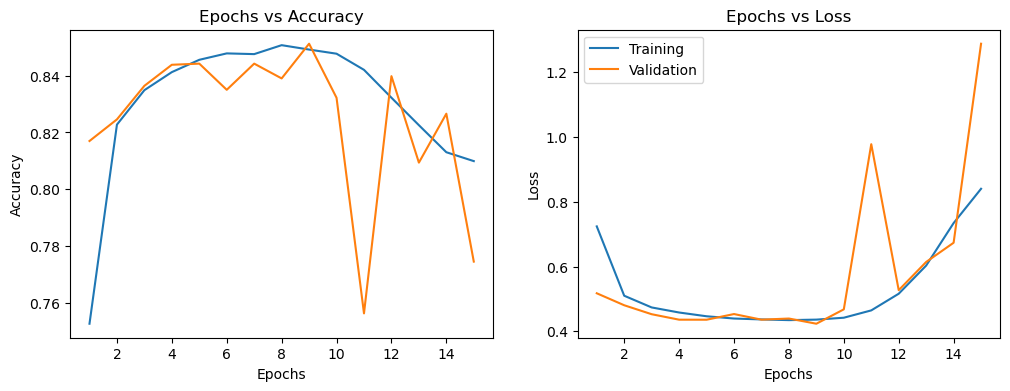

In [ ]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = list(range(1, len(train_loss) + 1))

# Create a figure and two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))  # 1 row, 2 columns

# Plot data on each subplot
ax1.plot(epochs, train_acc, label="Training")
ax1.plot(epochs, val_acc, label="Validation")
ax2.plot(epochs, train_loss, label="Training")
ax2.plot(epochs, val_loss, label="Validation")

# Add labels and title
ax1.set_xlabel("Epochs")
ax1.set_ylabel("Accuracy")
ax1.set_title("Epochs vs Accuracy")
ax2.set_xlabel("Epochs")
ax2.set_ylabel("Loss")
ax2.set_title("Epochs vs Loss")

# Add legend
plt.legend()

# Show the plot
plt.savefig(f"Output/{dataset} - Model 1.png")
plt.close()

### Model 2

In [ ]:
X_train_ri = np.array([X_train[i] for i in closest])
y_train_ri = np.array([y_train[i] for i in closest])

In [ ]:
tf.random.set_seed(42)
model2 = tf.keras.Sequential()
model2.add(tf.keras.layers.InputLayer(input_shape=[28, 28]))
model2.add(tf.keras.layers.Flatten())
model2.add(tf.keras.layers.Dense(300, activation="relu"))
model2.add(tf.keras.layers.Dense(100, activation="relu"))
model2.add(tf.keras.layers.Dense(10, activation="softmax"))

model2.compile(loss="sparse_categorical_crossentropy",
               optimizer="sgd",
               metrics=["accuracy"])

history = model2.fit(X_train_ri, 
                     y_train_ri, 
                     epochs=15,
                     verbose=0,
                     validation_data=(X_valid, y_valid))

#### Plotting Results

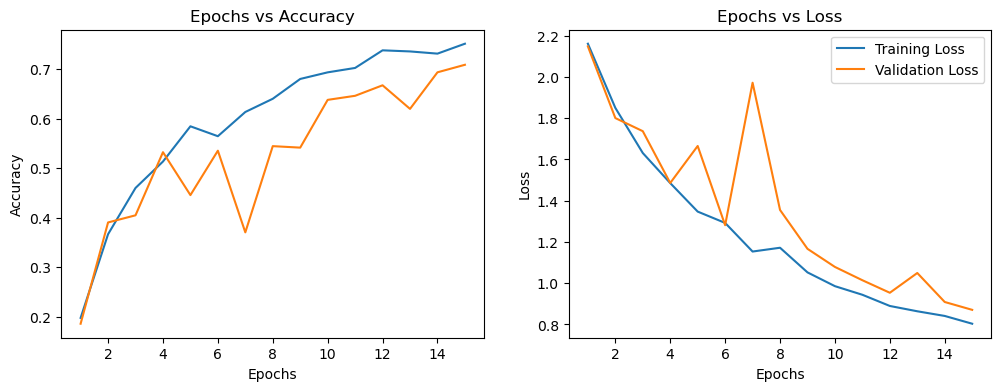

In [ ]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = list(range(1, len(train_loss) + 1))

# Create a figure and two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))  # 1 row, 2 columns

# Plot data on each subplot
ax1.plot(epochs, train_acc, label="Training Accuracy")
ax1.plot(epochs, val_acc, label="Validation Accuracy")
ax2.plot(epochs, train_loss, label="Training Loss")
ax2.plot(epochs, val_loss, label="Validation Loss")

# Add labels and title
ax1.set_xlabel("Epochs")
ax1.set_ylabel("Accuracy")
ax1.set_title("Epochs vs Accuracy")
ax2.set_xlabel("Epochs")
ax2.set_ylabel("Loss")
ax2.set_title("Epochs vs Loss")

# Add legend
plt.legend()

plt.savefig(f"Output/{dataset} - Model 2.png")
plt.close()

### Model 3

In [ ]:
X_train_fp = X_train
y_train_fp = np.empty(len(X_train_fp), dtype=np.int32)
for i in range(0,len(X_train_fp)):
   y_train_fp[i] = labels[km_old_labels[i]]

In [ ]:
tf.random.set_seed(42)
model3 = tf.keras.Sequential()
model3.add(tf.keras.layers.InputLayer(input_shape=[28, 28]))
model3.add(tf.keras.layers.Flatten())
model3.add(tf.keras.layers.Dense(300, activation="relu"))
model3.add(tf.keras.layers.Dense(100, activation="relu"))
model3.add(tf.keras.layers.Dense(10, activation="softmax"))

model3.compile(loss="sparse_categorical_crossentropy",
               optimizer="sgd",
               metrics=["accuracy"])

history = model3.fit(X_train_fp,
                     y_train_fp,
                     epochs=15,
                     verbose=0,
                     validation_data=(X_valid, y_valid))

#### Plotting Results

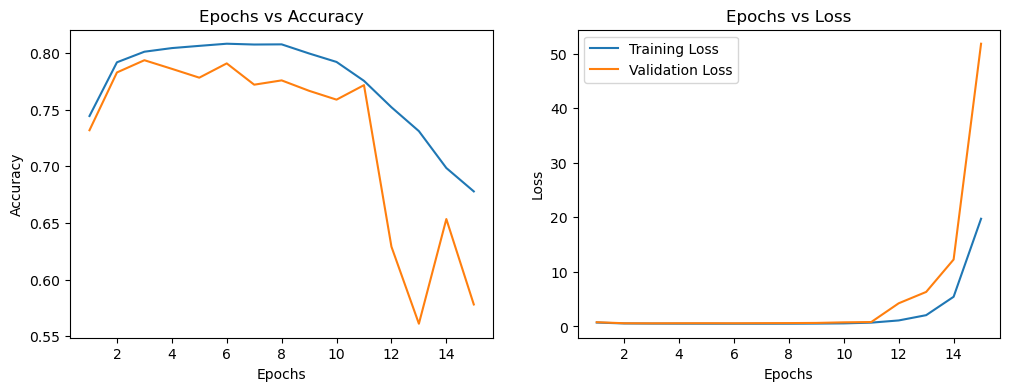

In [ ]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = list(range(1, len(train_loss) + 1))

# Create a figure and two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))  # 1 row, 2 columns

# Plot data on each subplot
ax1.plot(epochs, train_acc, label="Training Accuracy")
ax1.plot(epochs, val_acc, label="Validation Accuracy")
ax2.plot(epochs, train_loss, label="Training Loss")
ax2.plot(epochs, val_loss, label="Validation Loss")

# Add labels and title
ax1.set_xlabel("Epochs")
ax1.set_ylabel("Accuracy")
ax1.set_title("Epochs vs Accuracy")
ax2.set_xlabel("Epochs")
ax2.set_ylabel("Loss")
ax2.set_title("Epochs vs Loss")

# Add legend
plt.legend()

plt.savefig(f"Output/{dataset} - Model 3.png")
plt.close()

### Model 4

In [ ]:
X_distances = cluster_distance[np.arange(len(X_train)), kmeans.labels_]
for i in range(k):
    in_cluster = (kmeans.labels_ == i)
    cluster_dist = X_distances[in_cluster]
    cutoff = np.percentile(cluster_dist, 20)
    above_cutoff = (X_distances > cutoff)
    X_distances[in_cluster & above_cutoff] = -1

pp = (X_distances != -1)
X_train_pp = X_train[pp]
y_train_pp = y_train_fp[pp]

In [ ]:
tf.random.set_seed(42)
model4 = tf.keras.Sequential()
model4.add(tf.keras.layers.InputLayer(input_shape=[28, 28]))
model4.add(tf.keras.layers.Flatten())
model4.add(tf.keras.layers.Dense(300, activation="relu"))
model4.add(tf.keras.layers.Dense(100, activation="relu"))
model4.add(tf.keras.layers.Dense(10, activation="softmax"))

model4.compile(loss="sparse_categorical_crossentropy",
               optimizer="sgd",
               metrics=["accuracy"])

history = model4.fit(X_train_pp,
                     y_train_pp, 
                     epochs=15,
                     use_multiprocessing=True,
                     verbose=0,
                     validation_data=(X_valid, y_valid))

#### Plotting Results

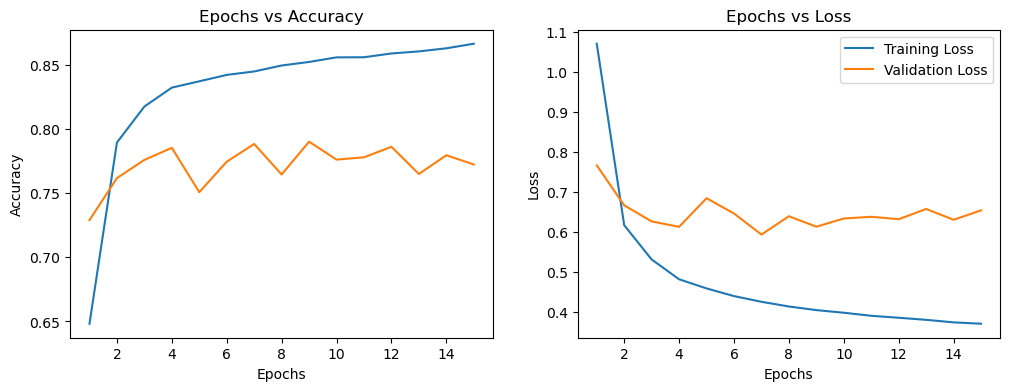

In [ ]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = list(range(1, len(train_loss) + 1))

# Create a figure and two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))  # 1 row, 2 columns

# Plot data on each subplot
ax1.plot(epochs, train_acc, label="Training Accuracy")
ax1.plot(epochs, val_acc, label="Validation Accuracy")
ax2.plot(epochs, train_loss, label="Training Loss")
ax2.plot(epochs, val_loss, label="Validation Loss")

# Add labels and title
ax1.set_xlabel("Epochs")
ax1.set_ylabel("Accuracy")
ax1.set_title("Epochs vs Accuracy")
ax2.set_xlabel("Epochs")
ax2.set_ylabel("Loss")
ax2.set_title("Epochs vs Loss")

# Add legend
plt.legend()

plt.savefig(f"Output/{dataset} - Model 4.png")
plt.close()